# 深度学习

## PyTorch基础
首先介绍里面最基本的操作对象，tensor。  
tensor就是张量的英文，表示多维的矩阵，比如一维就是向量，二维就是一般的矩阵等等，pytorch里面处理的单位就是一个一个的tensor

In [6]:
import torch
torch.Tensor(4,5)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.3060e-02],
        [7.3708e-43, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

* Variable  
pytorch和numpy不一样的地方，就是其提供了自动求导功能，也就是可以自动给你你要的参数的梯度，这个操作又另外一个基本元素提供， 
本质上Variable和Tensor没有区别，不过Variabel会放入一个计算图，然后进行前向传播，反向传播以及自动求导。  
一个Variable里面包含着三个属性，data，grad和creator，其中creator表示得到这个Variabel的操作，比如乘法或者加法等等，grad表示方向传播的梯度，data表示取出这个Variabel里面的数据  
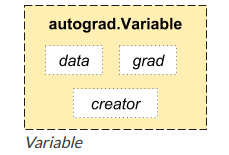

In [13]:
#  requires_grad 表示是否对其求梯度，默认是False
x = torch.autograd.Variable(torch.Tensor([3]),requires_grad=True)
y = torch.autograd.Variable(torch.Tensor([5]),requires_grad=True)
z = 2 * x + y + 4 

# 对 x 和 y 分别求导
z.backward()
print(x.grad.data)
print(y.grad.data)
print(x)
print(y)

tensor([2.])
tensor([1.])
tensor([3.], requires_grad=True)
tensor([5.], requires_grad=True)


## 神经网络  
前面讲了两个操作对象，最后讲一下pytorch里面的模型建立，模型的建立主要依赖于torch.nn，torch.nn包含这个所有神经网络的层的结构

In [4]:
import torch.nn as nn
class net_name(nn.Module):
    def __int__(self):
        super(net_name,self).__init__()
        # 可以添加各种网络层
        self.conv1 = nn.Conv2d(3, 10, 3)
        # 具体美中蹭的参数可以去查看文档
        
    def forward(self, x):
        # 定义向前传播
        out = self.conv1(x)
        return out
        

## 线性回归  
线性回归即给出一系列的点，找一条直线，使得这条直线与这些点的距离之和最小。

Epoch[20/1000], loss: 57.441483
Epoch[40/1000], loss: 40.682888
Epoch[60/1000], loss: 28.838808
Epoch[80/1000], loss: 20.468027
Epoch[100/1000], loss: 14.551984
Epoch[120/1000], loss: 10.370814
Epoch[140/1000], loss: 7.415758
Epoch[160/1000], loss: 5.327249
Epoch[180/1000], loss: 3.851168
Epoch[200/1000], loss: 2.807919
Epoch[220/1000], loss: 2.070570
Epoch[240/1000], loss: 1.549416
Epoch[260/1000], loss: 1.181055
Epoch[280/1000], loss: 0.920681
Epoch[300/1000], loss: 0.736625
Epoch[320/1000], loss: 0.606507
Epoch[340/1000], loss: 0.514510
Epoch[360/1000], loss: 0.449454
Epoch[380/1000], loss: 0.403438
Epoch[400/1000], loss: 0.370880
Epoch[420/1000], loss: 0.347832
Epoch[440/1000], loss: 0.331506
Epoch[460/1000], loss: 0.319931
Epoch[480/1000], loss: 0.311713
Epoch[500/1000], loss: 0.305868
Epoch[520/1000], loss: 0.301700
Epoch[540/1000], loss: 0.298718
Epoch[560/1000], loss: 0.296573
Epoch[580/1000], loss: 0.295020
Epoch[600/1000], loss: 0.293886
Epoch[620/1000], loss: 0.293048
Epoch[

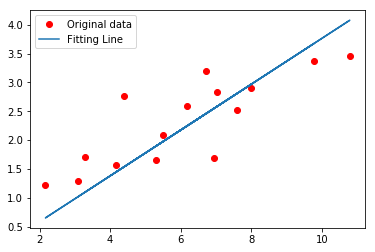

In [12]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)


# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        # nn.linear表示 y = w*x + b
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = LinearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.item()))

model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend() 
plt.show()

## logistic回归  

logistic回归简单来说和线性回归是一样的，要做的运算同样是 y = w * x b，但是用于处理分类问题。  
* logistic回归处理二分类问题  
使用sigmoid函数将所有的正数和负数都变成0-1之间的数，这样就可以用这个数来确定到底属于哪一类，可以简单的认为概率大于0.5即为第二类，小于0.5为第一类。  
Sigmoid函数：  
<img src="images/1fc3e5c19c13c474bf1e23cf97130dc5.png" > 
Sigmoid函数图像：
<img src="images/v2-a3b3e3f9106ecf5dd39180cd40e38eef_b.png" width="30%">  
* 多分类问题  
对于每一个数据，我们输出的维数是分类的总数，比如10分类，我们输出的就是一个10维的向量，然后我们使用另外一个激活函数，softmax函数，又称归一化指数函数:  
<img src="images/QQ截图20190528205507.jpg">  

In [ ]:
# 下载训练集 MNIST 手写数字训练集
train_dataset = datasets.MNIST(root=\'./data\', train=True,
                               transform=transforms.ToTensor(),
                               download=True)
 
test_dataset = datasets.MNIST(root=\'./data\', train=False,
                              transform=transforms.ToTensor())
 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# 模型
class Logstic_Regression(nn.Module):
    def __init__(self, in_dim, n_class):
        super(Logstic_Regression, self).__init__()
        self.logstic = nn.Linear(in_dim, n_class)
 
    def forward(self, x):
        out = self.logstic(x)
        return out
 
model = Logstic_Regression(28*28, 10)  # 图片大小是28x28
use_gpu = torch.cuda.is_available()  # 判断是否有GPU加速
if use_gpu:
    model = model.cuda()

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 训练
for epoch in range(num_epoches):
    print(\'epoch {}\'.format(epoch 1))
    print(\'*\'*10)
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_loader, 1):
        img, label = data
        img = img.view(img.size(0), -1)  # 将图片展开成 28x28
        if use_gpu:
            img = Variable(img).cuda()  # 注意我们如果将模型放到了gpu上，相应的我们的Variable也要放到gpu上，
            label = Variable(label).cuda()
        else:
            img = Variable(img)
            label = Variable(label)
        # 向前传播
        out = model(img)
        loss = criterion(out, label)
        running_loss  = loss.data[0] * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        running_acc  = num_correct.data[0]
        # 向后传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
          
    model.eval()